# Task 1: Percentage of student based on Study Hours

* Predict the percentage of student based on the number of study hours of student
* Predict the percentage of student who study 9.25 hr/day

In [1]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Loading our dataset
data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking whether the data is null or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Visualization

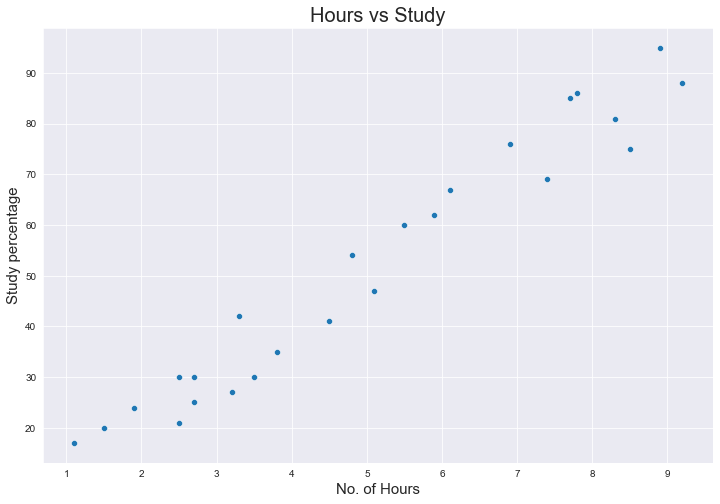

In [4]:
# Scatter plot of our data 
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(x=data['Hours'], y=data['Scores'])
plt.title('Hours vs Study', size=20)
plt.xlabel('No. of Hours', size=15)
plt.ylabel('Study percentage', size=15)
plt.show()

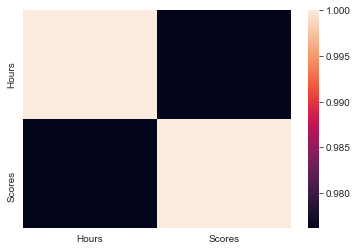

In [14]:
# Finding correlation between the attribute and we found that it's a positively correlated
sns.heatmap(data.corr())
plt.show()

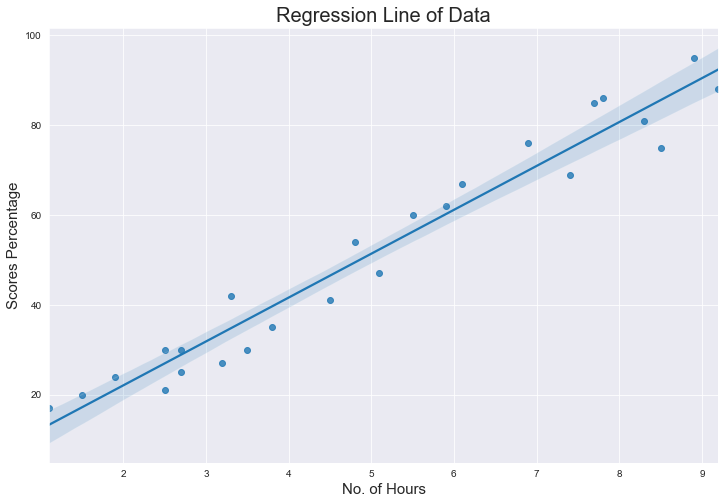

In [6]:
# Ploting regression Line
plt.figure(figsize=(12,8))
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('Regression Line of Data', size=20)
plt.xlabel('No. of Hours', size=15)
plt.ylabel('Scores Percentage', size=15)
plt.show()

### Model Training

In [7]:
# Splitting Data into training and testing
x = data.iloc[:, :-1].values
y = data.iloc[:, 1:].values

Train_X, Test_X, Train_Y, Test_Y = train_test_split(x, y, test_size=0.3, random_state=0)
print(Train_X.shape, Test_X.shape, Train_Y.shape, Test_Y.shape)

(17, 1) (8, 1) (17, 1) (8, 1)


In [8]:
Regression = LinearRegression()
Regression.fit(Train_X, Train_Y)
print('Model is trained')

Model is trained


### Model Prediction

In [9]:
Predict_Y = Regression.predict(Test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in Test_X], 'Scores': [k for k in Predict_Y]})
prediction

,Hours,Scores
0,1.5,[17.05366541246545]
1,3.2,[33.69422877993883]
2,7.4,[74.80620886428483]
3,2.5,[26.8422320992145]
4,5.9,[60.12335883416126]
5,3.8,[39.56736879198826]
6,1.9,[20.96909208716507]
7,7.8,[78.72163553898443]


### Compare Prediction

In [10]:
Compare_Score = pd.DataFrame({'Predicted Marks': [i for i in Predict_Y], 'Actual_Marks': [i for i in Test_Y]})
Compare_Score

,Predicted Marks,Actual_Marks
0,[17.05366541246545],[20]
1,[33.69422877993883],[27]
2,[74.80620886428483],[69]
3,[26.8422320992145],[30]
4,[60.12335883416126],[62]
5,[39.56736879198826],[35]
6,[20.96909208716507],[24]
7,[78.72163553898443],[86]


### Comparing Actual Marks with Predicted Marks

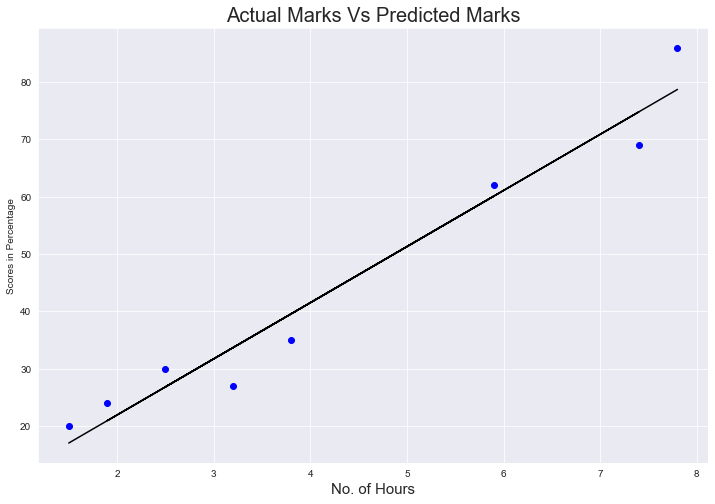

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(x=Test_X, y=Test_Y, color='blue')
plt.plot(Test_X, Predict_Y, color='black')
plt.title('Actual Marks Vs Predicted Marks', size=20)
plt.xlabel('No. of Hours', size=15)
plt.ylabel('Scores in Percentage')
plt.show()

### Model Evaluation

In [12]:
# Calculate the Accuracy of Model
print(f'Mean Absolute Error: {mean_absolute_error(Test_Y, Predict_Y)}')

Mean Absolute Error: 4.419727808027652


### Predicting score of student who studies 9.25 hrs/day.

In [13]:
hours = [9.25]
answer = Regression.predict([hours])
print(f"Score: {answer}")

Score: [[92.91505723]]
